In [ ]:
import pandas as pd
df_Train=pd.read_csv("fraudTrain.csv")
df_Test=pd.read_csv("fraudTest.csv")
df_Test


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15577,15577,2020-06-26 18:05:18,213157767990030,"fraud_Schneider, Hayes and Nikolaus",food_dining,55.89,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971,Music therapist,1984-08-01,91e1ab648de605bdcc8b16b808ad9c32,1372269918,42.376537,-110.103197,0.0
15578,15578,2020-06-26 18:05:19,4586810168620942,"fraud_Bernhard, Grant and Langworth",shopping_pos,107.97,Michelle,Gregory,F,6983 Carrillo Isle,...,32.5486,-80.3070,2408,"Sales professional, IT",1997-07-05,8df25e774f817fe32800e369641717bc,1372269919,31.943086,-80.964283,0.0
15579,15579,2020-06-26 18:05:32,3514897282719543,"fraud_Romaguera, Wehner and Tromp",kids_pets,70.27,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,72690f61cdc9525fd467b04bc63eea47,1372269932,42.022181,-77.312639,0.0
15580,15580,2020-06-26 18:05:48,4452366298769043,"fraud_Reichert, Huels and Hoppe",shopping_net,6.39,Linda,Davis,F,6602 Ortiz Pine Apt. 179,...,32.0758,-96.7010,1563,Financial adviser,1978-03-04,2e58bb3d59498b44941cbbe627c75030,1372269948,32.759573,-96.948820,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

In [ ]:
df_Train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15593.000000,1.559300e+04,15593.000000,15593.000000,15593.000000,15593.000000,1.559300e+04,1.559300e+04,15593.000000,15592.000000,15592.000000
mean,7796.000000,4.227322e+17,70.287882,49063.363496,38.537959,-90.429812,9.211852e+04,1.325778e+09,38.540346,-90.423190,0.006414
std,4501.455709,1.316358e+18,126.759764,27027.725226,5.164709,14.225426,3.075263e+05,2.268460e+05,5.190365,14.246013,0.079830
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.629875,0.000000
25%,3898.000000,1.800462e+14,9.610000,26041.000000,34.690200,-96.962300,7.430000e+02,1.325582e+09,34.787849,-97.074937,0.000000
50%,7796.000000,3.520550e+15,47.960000,48206.000000,39.342600,-87.591700,2.471000e+03,1.325814e+09,39.347491,-87.516981,0.000000
75%,11694.000000,4.642255e+15,83.300000,72059.000000,41.811400,-80.158000,2.112500e+04,1.325968e+09,41.886835,-80.219347,0.000000
max,15592.000000,4.992346e+18,5444.240000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326155e+09,66.645176,-66.967742,1.000000


In [ ]:
df_Test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
df_Train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

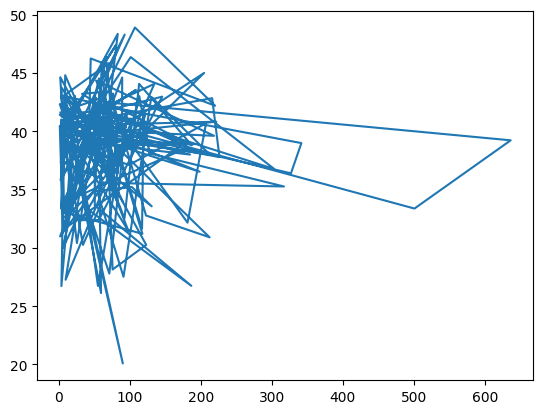

In [ ]:
import matplotlib.pyplot as plt
x=df_Train['amt'][:200]
y=df_Train["lat"][:200]
plt.plot(x,y)
plt.show()

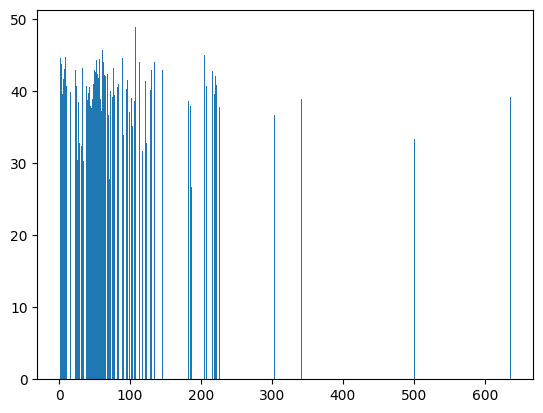

In [ ]:
plt.bar(x,y)
plt.show()

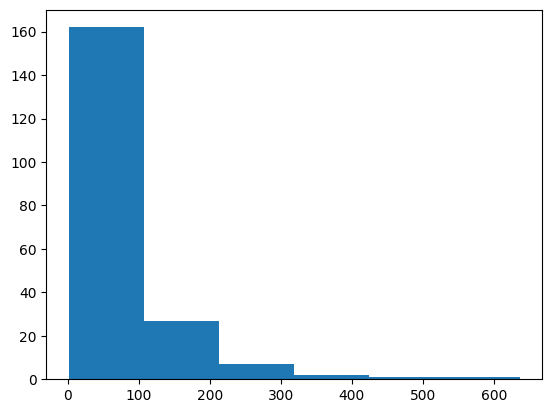

In [ ]:
plt.hist(x,bins=6)
plt.show()

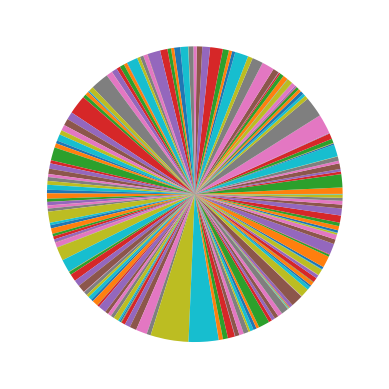

In [ ]:
plt.pie(x)
plt.show()

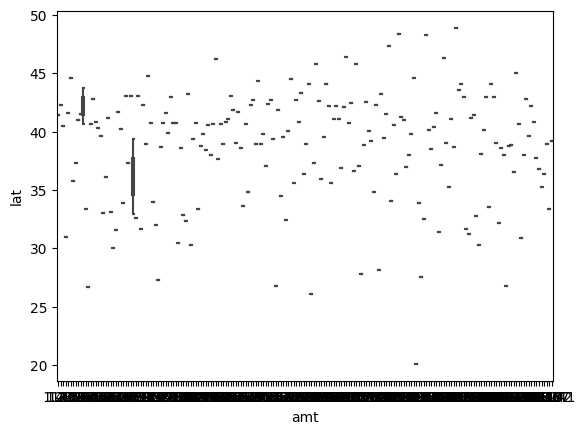

In [ ]:
sns.boxplot(data=df_Train,x=x,y=y)
plt.show()

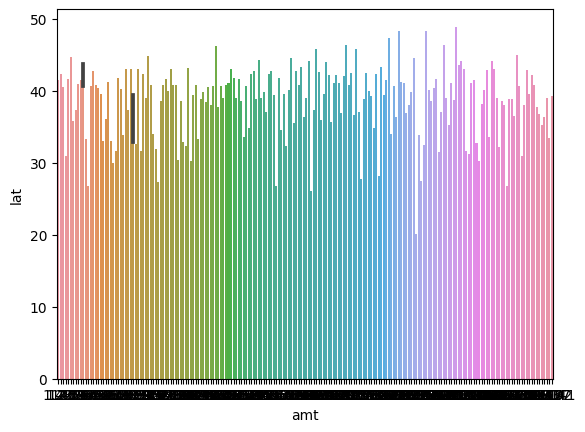

In [ ]:
import seaborn as sns
sns.barplot(data=df_Train,x=x,y=y)
plt.show()

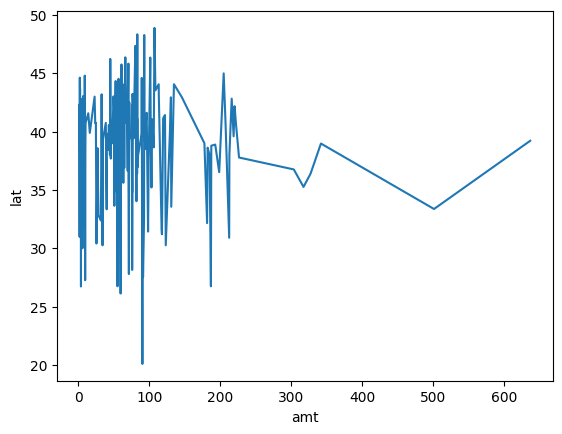

In [ ]:
sns.lineplot(data=df_Train,x=x,y=y)
plt.show()

In [ ]:
df_Train.fillna(-999,inplace=True)
df_Test.fillna(-999,inplace=True)
#df_Train.isnull().sum()
#df_Test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
X=['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']
y=df_Train['is_fraud']
xtrain=df_Train[X]



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(xtrain,y,random_state=21,test_size=0.4)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y_pred)
print("accuracy:",acc)

accuracy: 0.9951907662712408
